# seaborn - 기본 그래프

matplotlib을 기반으로 하는 python 데이터 시각화 라이브러리

matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가하였음

## 주요 파라미터

| 파라미터 | 설명 |
|---|---|
| `data`ㅤ| 데이터 구조 입력. 일반적으로 데이터프레임 객체<br/>list, ndarray, Series 등의 연속형 데이터를 직접 설정할 수 도 있다. |
| `x`, `y`ㅤ| x, y축의 값을 지정하는 변수<br/>`data`를 설정하지 않은 경우 리스트 등의 연속형 변수<br/>`data`를 설정한 경우 데이터프레임의 컬럼이름 |
| `hue` | 데이터를 구분하기 위한 그룹화 변수(범주형 변수)<br/>`data`를 설정한 경우 데이터프레임의 컬럼이름 |
| `size`ㅤ| 너비가 다른 선을 생성하는 그룹화 변수 (마커의 경우, 마커의 크기가 다르게 나타남) |
| `style`ㅤ| 다른 스타일의 마커 또는 선을 생성하는 그룹화 변수 |
| `palette`ㅤ| 색상 체계 선택 |

## #01. 준비작업

### [1] 패키지 참조

`seaborn` 패키지의 설치가 필요하다.

In [1]:
import sys
import seaborn as sb
from pandas import read_excel
from matplotlib import pyplot as plt

### [2] 그래프 전역 설정

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["axes.unicode_minus"] = False

### [3] 데이터 가져오기

In [3]:
origin = read_excel("https://data.hossam.kr/pydata/poll.xlsx")
origin

,성별,결혼상태,나이,최종학력,월수입
0,남자,기혼,21,대학교,60
1,남자,기혼,22,대학원,100
2,남자,기혼,33,대학교,200
3,여자,미혼,33,대학교,120
4,남자,미혼,28,대학교,70
5,남자,기혼,21,대학원,80
6,여자,미혼,39,대학교,190
7,남자,기혼,32,대학교,100
8,남자,미혼,44,초등학교,120
9,남자,미혼,55,대학교,110


## #02. BoxPlot

### [1] 단일 변수에 대한 처리

`seaborn` 객체의 `boxplot()` 메서드를 사용한다.

#### (1) 데이터 직접 전달하기

list, ndarray, Series 등 모든 연속형 객체를 `data` 파라미터에 지정한다.

`y` 파라미터에 설정하더라도 같은 결과를 보여준다.

`x` 파라미터에 설정할 경우 가로 상자그림으로 표시된다.

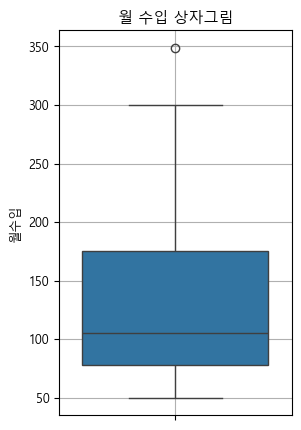

In [4]:
plt.figure(figsize=(3, 5), dpi=100)
sb.boxplot(data=origin['월수입'])
plt.grid()
plt.title("월 수입 상자그림")
plt.show()
plt.close()

#### (2) 데이터 프레임을 통한 처리

`data` 파라미터에 데이터 프레임을 설정하고 `y` 파라미터에 표시하고자 하는 변수 이름을 설정한다.

`x` 파라미터에 설정할 경우 가로 상자그림으로 표시된다.

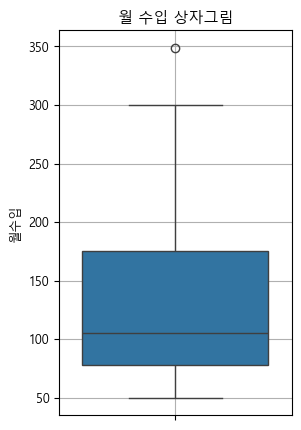

In [5]:
plt.figure(figsize=(3, 5), dpi=100)
sb.boxplot(data=origin, y='월수입')
plt.grid()
plt.title("월 수입 상자그림")
plt.show()
plt.close()

#### (3) 상자그림의 방향 설정하기

`data` 파라미터에 연속형 데이터를 직접 전달한 경우 `orient=h` 파라미터를 설정하면 가로 상자그림으로 설정된다.

`orient=v` 파라미터를 설정하면 세로 상자그림으로 설정된다.

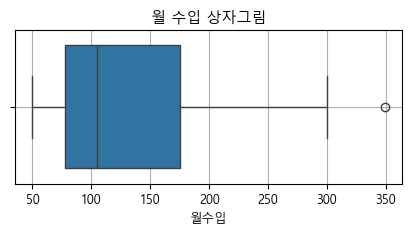

In [6]:
plt.figure(figsize=(5, 2), dpi=100)
sb.boxplot(data=origin['월수입'], orient='h')
plt.grid()
plt.title("월 수입 상자그림")
plt.show()
plt.close()

### [2] 복수 변수에 대한 처리

표시하고자 하는 변수를 필터링하여 `data` 파라미터에 설정한다.

`orient=v` 파라미터를 설정하여 가로로 표시할 수 있다.

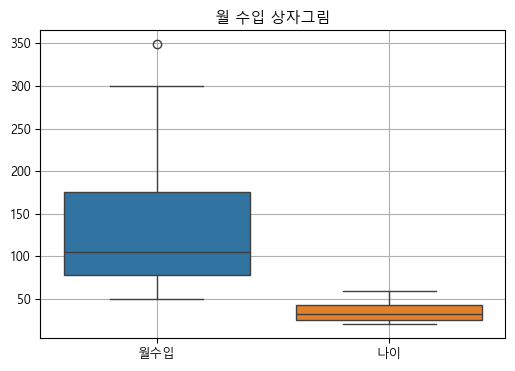

In [7]:
plt.figure(figsize=(6, 4), dpi=100)
sb.boxplot(data=origin[['월수입','나이']])
plt.grid()
plt.title("월 수입 상자그림")
plt.show()
plt.close()

## #03. Histogram

### [1] 단일 변수에 대한 처리

#### (1) 기본 히스토그램

`seaborn` 객체의 `histplot()` 메서드를 사용한다.

`bins` 파라미터에 구간 수 정수로 지정하거나 구간을 정의하는 리스트를 사용하여 구간을 직접 정의할 수 있다.

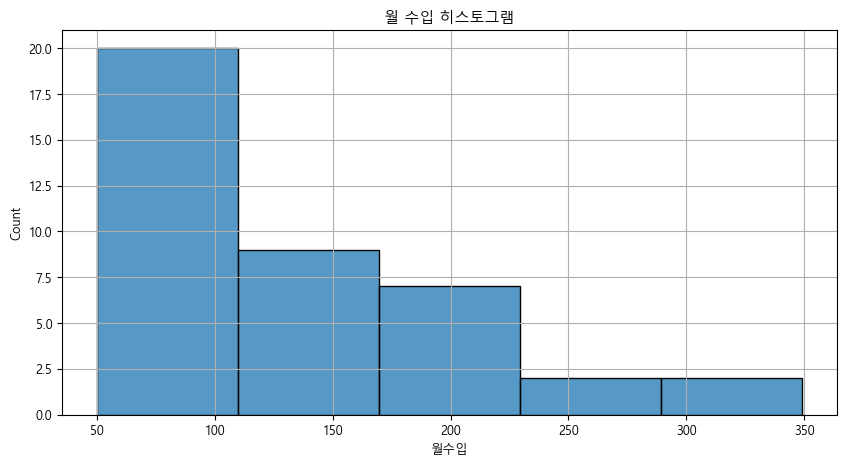

In [8]:
plt.figure(figsize=(10, 5), dpi=100)
sb.histplot(data=origin, x='월수입', bins=5)
plt.grid()
plt.title("월 수입 히스토그램")
plt.show()
plt.close()

#### (2) 커널밀도를 함께 표시하기

`kde=True` 파라미터를 설정한다.

> **커널밀도**
>
> 커널 밀도 추정(KDE; Kernel density estimation)은 유한한 데이터 샘플을 기반으로 전체 모집단에 대한 확률밀도함수를 추정하는 비모수적인 방법 중 하나
> 
> 특정 데이터 집합의 분포를 파악하는 데 사용된다. 
> 
> 커널밀도 추정은 히스토그램보다 더 유연하며 매끄러운 추정을 제공하므로 데이터 분포를 더 잘 이해하는 데 도움이 된다.
>
> **비모수적 방법**
>
> 관측 값이 어느 특정한 확률분포를 따른다고 전제할 수 없거나 또는 모집단에 대한 아무런 정보가 없는 경우에 실시하는 검정방법

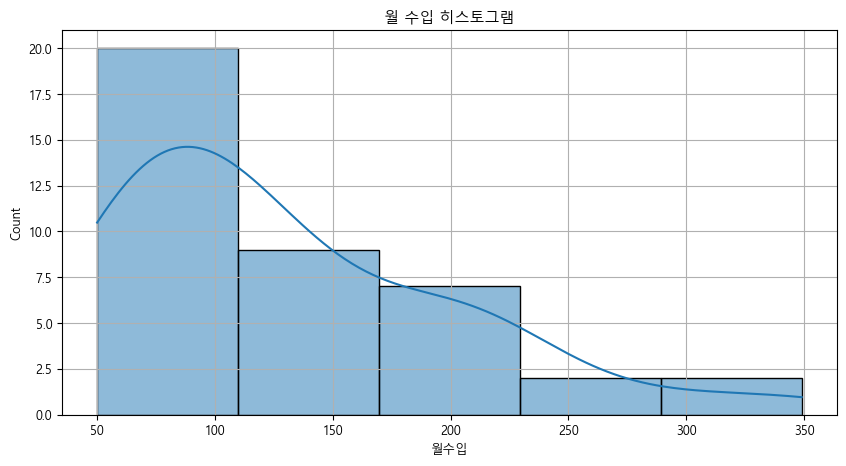

In [9]:
plt.figure(figsize=(10, 5), dpi=100)
sb.histplot(data=origin, x='월수입', bins=5, kde=True)
plt.grid()
plt.title("월 수입 히스토그램")
plt.show()
plt.close()

### [2] 복수 변수에 대한 처리

`hue` 파라미터에 데이터 구분을 위한 범주형 변수를 설정한다.

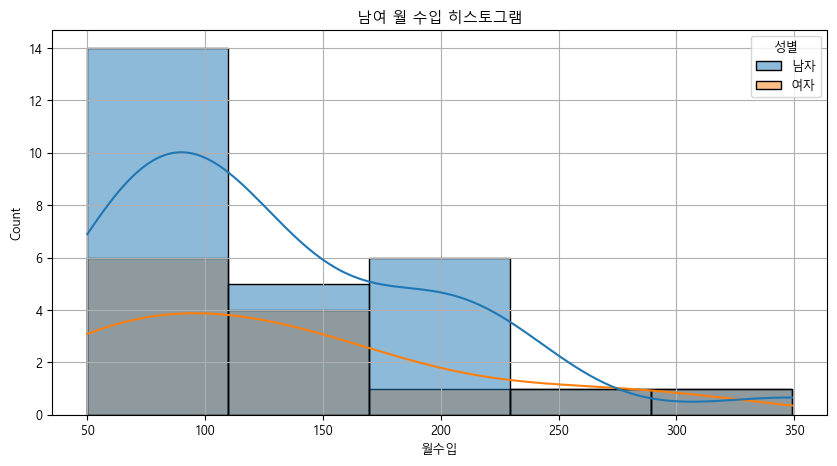

In [10]:
plt.figure(figsize=(10, 5), dpi=100)
sb.histplot(data=origin, x='월수입', bins=5, kde=True, hue='성별')
plt.grid()
plt.title("남여 월 수입 히스토그램")
plt.show()
plt.close()